### IMPORTING LIBRARIES

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt


# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [2]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex01-05_06_19-Edited.xlsx')
mice.head()

,Minutes,Date,Time,B6-100 Exp. 1 MRSA Deg. C Data,B6-100 Exp. 1 MRSA Cnts Data,B6-101 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Cnts Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Cnts Data,CC002-558 Exp. 1 MRSA Deg. C Data,...,CC015-392 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Cnts Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Cnts Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Cnts Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Cnts Data,CC051-496 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Cnts Data
0,1,2019-04-26,13:10:47,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2,2019-04-26,13:11:47,NaN,69.0,NaN,19.0,NaN,37.0,NaN,...,NaN,77.0,NaN,38.0,NaN,39.0,NaN,74.0,NaN,31.0
2,3,2019-04-26,13:12:47,37.54,8.0,37.82,46.0,37.50,60.0,37.79,...,39.34,64.0,38.80,42.0,38.37,67.0,38.16,39.0,38.02,19.0
3,4,2019-04-26,13:13:47,37.56,0.0,37.74,35.0,37.64,18.0,37.78,...,39.35,48.0,38.76,26.0,38.31,22.0,38.18,38.0,38.10,47.0
4,5,2019-04-26,13:14:47,37.50,0.0,37.74,62.0,37.77,13.0,37.72,...,39.36,20.0,38.59,15.0,38.25,23.0,38.16,45.0,38.14,34.0


Text(0, 0.5, 'Temperature (Celsius)')

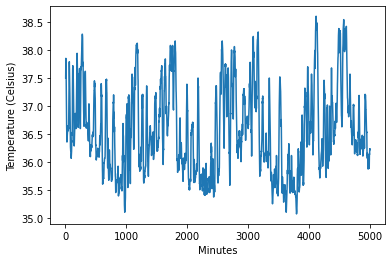

In [3]:
## Selecting columns and the first 5000 rows then plotting 
x = mice["Minutes"]
y = mice.iloc[:,7]

plt.plot(x[:5000],y[:5000])
plt.xlabel("Minutes") #x label
plt.ylabel("Temperature (Celsius)") #y label


Text(0, 0.5, 'Temperature (Celsius)')

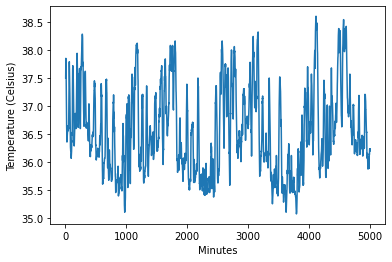

In [4]:
mask = y.notna() # will keep the true values
x1 = x[mask]
y1 = y[mask]
plt.plot(x1[:5000],y1[:5000])
plt.xlabel("Minutes") #x label
plt.ylabel("Temperature (Celsius)") #y label

In [5]:
len(x)-len(x1) #we got rid of 225 data points

5842

In [6]:
#Time Delay Embedding
X = tde.tde(y1)
X=X.T #transporting the data
X

array([[36.15, 36.65, 37.5 ],
       [36.13, 36.65, 37.64],
       [36.1 , 36.63, 37.77],
       ...,
       [37.75, 37.25, 37.13],
       [37.71, 37.24, 37.14],
       [37.66, 37.24, 37.14]])

### TRAIN TEST SPLIT


In [7]:
#importing the model
model = svm.OneClassSVM()

#fit the data
model.fit(X[:5000,:])

#predict the data
predict = model.predict(X[5001:,:])

#creating a second mask in which outliers = -1
#mask1 = outliers == -1
#Xmask = X[5001:][mask1]

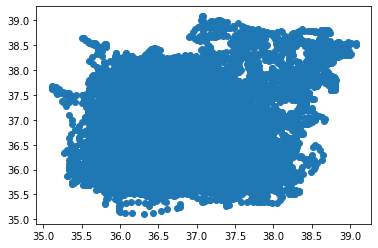

In [8]:
plt.scatter(X[5001:,0],X[5001:,1])

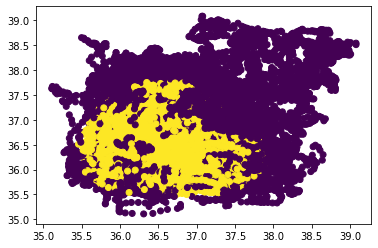

In [9]:
#plotting the scatterplot
plt.scatter(X[5001:,0],X[5001:,1], c = predict)


In [10]:
predict

array([ 1,  1,  1, ..., -1, -1, -1])

In [11]:
scores = model.score_samples(X[5001:,:])
scores

array([646.38576184, 648.31132953, 647.36152957, ..., 377.67529811,
       386.60324728, 397.89230694])

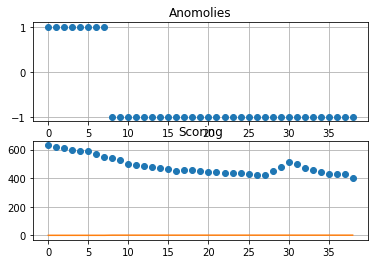

In [12]:
plt.subplot(2, 1, 1)
#plt.plot(predict,'o')
plt.plot(predict[5001:5040],'o')
plt.grid()
plt.title("Anomolies")

plt.subplot(2, 1, 2)
#plt.plot(scores,'o')
plt.plot(scores[5001:5040],'o')
plt.grid()
plt.title("Scoring")

thresh=predict==-1
plt.subplot(2, 1, 2)
plt.plot(thresh[5001:5040])

In [13]:
xtime=x1[5001:]

ValueError: 'c' argument has 12832 elements, which is inconsistent with 'x' and 'y' with size 16000.

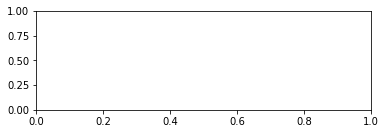

In [19]:
plt.subplot(2, 1, 1)
#plt.plot(predict,'o')
plt.scatter(x1[0:16000],y1[0:16000],c=predict[0:16000])
plt.grid()
plt.title("Anomolies")

plt.subplot(2, 1, 2)
#plt.plot(scores,'o')
plt.plot(x1[0:16000],scores[0:16000])
plt.grid()
plt.title("Scoring")



ValueError: x and y must have same first dimension, but have shapes (13552,) and (12832,)

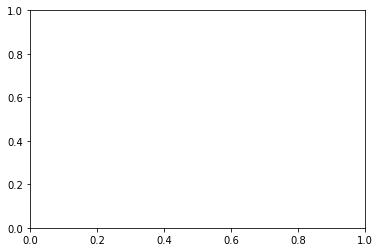

In [15]:
plt.plot(xtime,predict)

In [ ]:
(len(X)-5000)/len(X) #This is only showing 78.7% of the data for one mice 

In [ ]:
#plt.scatter(X[5001:,1],X[5001:,2], c = outliers)

In [ ]:
#nonanomaly = outliers ==1
nonanomoly = predict == 1
x_nonanomoly = X[5001:,:][nonanomoly]
plot_nonanom= plt.scatter(x_nonanomoly[:, 0], x_nonanomoly[:, 1], c=predict[nonanomoly])

In [ ]:
#anomaly = outliers ==-1
anomoly = outliers == -1
x_anomoly = X[5001:,][anomoly]
plot_anom= plt.scatter(x_anomoly[:, 0], x_anomoly[:, 1], c="red")

In [ ]:
#plt.plot(x1[5001:], X[5001:])
len(x1)

In [ ]:
len()

In [ ]:
plt.plot(x1[:5000],y1[:5000])

In [ ]:
plt.plot(x1[5001:],y1[5001:], c=outliers[x_anomoly])

In [ ]:
plt.plot(x1[:],y1[:])